<a href="https://colab.research.google.com/github/yesimemma/horror-genres/blob/main/Assignment_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the data

In [1]:
import pandas as pd

# Specify the path to the CSV file
csv_file_path = 'data/horror.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head()


,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt15679400,Knock at the Cabin,2023,R,100 min,"Horror, Mystery, Thriller",6.4,"While vacationing, a girl and her parents are ...",M. Night Shyamalan,/name/nm0796117/,"Dave Bautista, \nJonathan Groff, \nRupert Grin...","/name/nm1176985/,/name/nm2676147/,/name/nm0342...",17991.0,NaN
1,tt9764362,The Menu,2022,R,107 min,"Horror, Thriller",7.2,A young couple travels to a remote island to e...,Mark Mylod,/name/nm0617042/,"Ralph Fiennes, \nAnya Taylor-Joy, \nNicholas H...","/name/nm0000146/,/name/nm5896355/,/name/nm0396...",232052.0,NaN
2,tt8760708,M3GAN,2022,PG-13,102 min,"Horror, Sci-Fi, Thriller",6.4,A robotics engineer at a toy company builds a ...,Gerard Johnstone,/name/nm2067421/,"Allison Williams, \nViolet McGraw, \nRonny Chi...","/name/nm4129745/,/name/nm8627157/,/name/nm5307...",62458.0,NaN
3,tt13051810,Viking Wolf,2022,TV-MA,97 min,"Horror, Thriller",5.1,Thale (17) has just moved with her parents to ...,Stig Svendsen,/name/nm1457169/,"Liv Mjönes, \nElli Rhiannon Müller Osborne, \n...","/name/nm1203571/,/name/nm9602953/,/name/nm7416...",3872.0,NaN
4,tt10365998,Infinity Pool,2023,R,117 min,"Crime, Horror, Mystery",6.5,James and Em Foster are enjoying an all-inclus...,Brandon Cronenberg,/name/nm0188722/,"Alexander Skarsgård, \nMia Goth, \nCleopatra C...","/name/nm0002907/,/name/nm5301405/,/name/nm1671...",6955.0,NaN


# Explore the data

### Note, for additional exploration and failed attampts, please feel free to see the other files in this folder!

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36682 entries, 0 to 36681
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_id     36682 non-null  object 
 1   movie_name   36682 non-null  object 
 2   year         29091 non-null  object 
 3   certificate  9747 non-null   object 
 4   runtime      23362 non-null  object 
 5   genre        36682 non-null  object 
 6   rating       21159 non-null  float64
 7   description  36682 non-null  object 
 8   director     33617 non-null  object 
 9   director_id  33617 non-null  object 
 10  star         29552 non-null  object 
 11  star_id      30328 non-null  object 
 12  votes        21159 non-null  float64
 13  gross(in $)  1346 non-null   float64
dtypes: float64(3), object(11)
memory usage: 3.9+ MB


In [3]:
df.describe()

,rating,votes,gross(in $)
count,21159.000000,2.115900e+04,1.346000e+03
mean,5.013337,5.032129e+03,1.735535e+07
std,1.402012,2.842056e+04,3.049266e+07
min,1.000000,5.000000e+00,2.000000e+01
25%,4.000000,3.900000e+01,1.231282e+05
50%,5.000000,1.890000e+02,3.352646e+06
75%,6.000000,1.050500e+03,2.232518e+07
max,9.700000,1.032203e+06,3.274817e+08


In [4]:
df.isnull().sum()

,0
movie_id,0
movie_name,0
year,7591
certificate,26935
runtime,13320
genre,0
rating,15523
description,0
director,3065
director_id,3065


In [5]:
df_genres = df['genre'].reset_index()
df_genres

# Split the "genre" column by commas
df_genres["genre"] = df_genres["genre"].str.split(", ")

# Create separate columns for each genre
df_genres = df_genres.explode("genre").reset_index(drop=True)

# Display the updated DataFrame
df_genres["genre"].value_counts()


,count
genre,
Horror,35643
Thriller,7608
Drama,5327
Comedy,4694
Mystery,3821
Action,2823
Fantasy,2330
Sci-Fi,2219
Crime,1605


<ipython-input-6-3ae1f9e558d3>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts_excluding_horror.index, y=genre_counts_excluding_horror.values, palette="viridis")


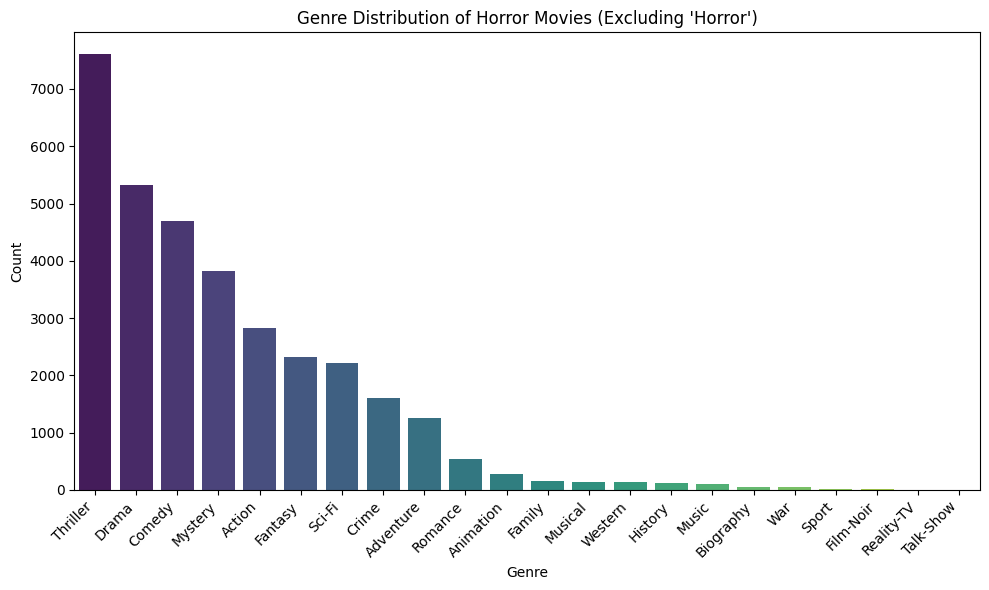

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Split the "genre" column by commas
df_genres["genre"] = df_genres["genre"].str.split(", ")

# Create separate rows for each genre
df_genres = df_genres.explode("genre").reset_index(drop=True)

# Count the occurrences of each genre
genre_counts = df_genres["genre"].value_counts()

# Exclude "Horror" genre from the counts
genre_counts_excluding_horror = genre_counts[genre_counts.index != "Horror"]

# Plot the genre distribution using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts_excluding_horror.index, y=genre_counts_excluding_horror.values, palette="viridis")
plt.title("Genre Distribution of Horror Movies (Excluding 'Horror')")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Data Cleansing

### Keep only those in English

In [7]:
# Import the "data.tsv" dataset and keep only the "titleId" and "language" columns
lang = pd.read_csv("data/data.tsv", sep="\t", usecols=["titleId", "language"])

lang.head()

,titleId,language
0,tt0000005,en
1,tt0000010,en
2,tt0000012,en
3,tt0000012,en
4,tt0000012,en


In [8]:
lang = lang[lang['language'] == "en"]

# Remove duplicates based on the 'movie_id' and 'language' columns
lang_unique = lang.drop_duplicates(subset=["titleId", "language"])

lang_unique.head()

,titleId,language
0,tt0000005,en
1,tt0000010,en
2,tt0000012,en
6,tt0000013,en
7,tt0000016,en


In [9]:
# Merge "df" with "data_df" on "movie_id"
df = df.merge(lang_unique, left_on="movie_id", right_on="titleId", how="inner")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4055 entries, 0 to 4054
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_id     4055 non-null   object 
 1   movie_name   4055 non-null   object 
 2   year         4054 non-null   object 
 3   certificate  2627 non-null   object 
 4   runtime      3916 non-null   object 
 5   genre        4055 non-null   object 
 6   rating       3947 non-null   float64
 7   description  4055 non-null   object 
 8   director     4055 non-null   object 
 9   director_id  4055 non-null   object 
 10  star         4040 non-null   object 
 11  star_id      4045 non-null   object 
 12  votes        3947 non-null   float64
 13  gross(in $)  710 non-null    float64
 14  titleId      4055 non-null   object 
 15  language     4055 non-null   object 
dtypes: float64(3), object(13)
memory usage: 507.0+ KB


### Clean up descriptions

In [10]:
import re
from nltk.corpus import stopwords

df["cleaned_description"] = df["description"]

exclusion_pattern = r"add a plot|plot.*unknown|plot.*under wraps|disclosed|under wraps|NA|coming soon"
df = df[~df["cleaned_description"].str.contains(exclusion_pattern, flags=re.IGNORECASE, regex=True)]

df["cleaned_description"].value_counts()


,count
cleaned_description,
"Dr. Henry Jekyll experiments with scientific means of revealing the hidden, dark side of man and releases a murderer from within himself.",3
"A corrupt young man somehow keeps his youthful beauty, but a special painting gradually reveals his inner ugliness to all.",2
The crew of a commercial spacecraft encounter a deadly lifeform after investigating an unknown transmission.,1
"Martial-arts expert, Alex, the fearless ""Shadow Warrior"" battles an army of blood thirsty vampires to stop a huge smuggling ring. He fights to destroy the operation, using all his warrior skills.",1
"Hikari is a boy who is bullied and teased by the other boys at school because he has the odd distinction of having an electricity pole growing out of his back. However, one of his ... See full summary »",1
...,...
A group of nuns become possessed by demons and are then tortured in a dungeon of horrors during the inquisition.,1
Count Dracula terrorizes the crew of a spaceship.,1
"The aftermath of the Oxygen Destroyer brings forth Destoroyah, a beast intent on killing Godzilla, who is on the verge of a nuclear meltdown.",1


In [11]:

# Get the set of stopwords
stopwords_set = set(stopwords.words('english'))

# Create a function to remove stopwords, symbols, and numeric words from a given text
def clean_text(text):
    # Remove common symbols
    cleaned_text = re.sub(r'[.,!?;"\'-]', '', text)

    # Remove stopwords
    words = cleaned_text.split()
    words_without_stopwords = [word for word in words if word.lower() not in stopwords_set]

    return " ".join(words_without_stopwords)

# Apply the clean_text function to the "description" column
df["cleaned_description"] = df["description"].apply(clean_text)

df["cleaned_description"].head()


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [12]:
#make the description all lower-case
df.loc[:, "cleaned_description"] = df["cleaned_description"].str.lower()

# Define the words to be excluded from the "description" column
excluded_words = ["plot", "see", "full", "summary","»"]

# Additional number words to be excluded
number_words = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten"]

# Remove the excluded words from the "description" column
for word in excluded_words:
    df["cleaned_description"] = df["cleaned_description"].str.replace(word, "")
for word in number_words:
    df["cleaned_description"] = df["cleaned_description"].str.replace(word, "")

# Count the occurrence of each word in the "description" column
word_counts = df["cleaned_description"].str.split(expand=True).stack().value_counts()

# Get the top 100 most used words
word_counts.reset_index().head(10)


,index,count
0,a,5094
1,the,3640
2,to,2300
3,of,2198
4,and,1779
5,in,1488
6,his,1014
7,is,996
8,an,805
9,by,734


In [13]:
# Calculate the length of each description in the "description" column
description_lengths = df['description'].apply(len)

# Count the occurrences of each unique length and sort by length in ascending order
sorted_length_counts = description_lengths.value_counts().sort_index()

print(sorted_length_counts)

df[df['description'].apply(len) < 30]

description
22     1
28     2
37     2
38     2
39     2
      ..
257    1
264    1
266    1
345    1
400    1
Name: count, Length: 211, dtype: int64


,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $),titleId,language,cleaned_description
2172,tt0070893,Voodoo Black Exorcist,1974,R,88 min,Horror,2.9,Voodoo Black Exorcist.,Manuel Caño,/name/nm0147451/,"Aldo Sambrell, \nTanyeka Stadler, \nAlexander ...","/name/nm0759757/,/name/nm0821167/,/name/nm2224...",386.0,NaN,tt0070893,en,voodoo black exorcist.
2921,tt0400764,Vismayathumbathu,2004,Not Rated,144 min,"Comedy, Horror, Mystery",5.1,A soul in search of herself.,Fazil,/name/nm0269778/,"Mohanlal, \nJijoy Rajagopalan, \nNayanthara, \...","/name/nm0482320/,/name/nm6410449/,/name/nm1521...",491.0,NaN,tt0400764,en,a soul in search of herself.
3066,tt0251978,Santo vs. the Strangler,1965,NaN,90 min,"Crime, Horror, Musical",5.4,Santo battles the Strangler.,René Cardona,/name/nm0136579/,"Santo, \nMaría Duval, \nRoberto Cañedo, \nOfel...","/name/nm0763803/,/name/nm0245065/,/name/nm0147...",79.0,NaN,tt0251978,en,santo battles the strangler.


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2784 entries, 2 to 4053
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie_id             2784 non-null   object 
 1   movie_name           2784 non-null   object 
 2   year                 2783 non-null   object 
 3   certificate          1954 non-null   object 
 4   runtime              2727 non-null   object 
 5   genre                2784 non-null   object 
 6   rating               2758 non-null   float64
 7   description          2784 non-null   object 
 8   director             2784 non-null   object 
 9   director_id          2784 non-null   object 
 10  star                 2784 non-null   object 
 11  star_id              2784 non-null   object 
 12  votes                2758 non-null   float64
 13  gross(in $)          523 non-null    float64
 14  titleId              2784 non-null   object 
 15  language             2784 non-null   object

## Understanding duplicates

In [15]:
df['description'].duplicated().sum()

3

In [16]:
duplicates_mask = df.duplicated(subset='description', keep=False)
duplicate_entries = df[duplicates_mask]

duplicate_entries.reset_index().sort_values(by='description')

,index,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $),titleId,language,cleaned_description
0,589,tt0037988,The Picture of Dorian Gray,1945,Not Rated,110 min,"Drama, Fantasy, Horror",7.5,A corrupt young man somehow keeps his youthful...,Albert Lewin,/name/nm0506797/,"George Sanders, \nHurd Hatfield, \nDonna Reed,...","/name/nm0001695/,/name/nm0368836/,/name/nm0001...",13633.0,NaN,tt0037988,en,a corrupt young man somehow keeps his youthful...
1,1338,tt0364599,The Picture of Dorian Gray,2004,NaN,90 min,"Drama, Horror",4.0,A corrupt young man somehow keeps his youthful...,Dave Rosenbaum,/name/nm0742125/,"Josh Duhamel, \nBranden Waugh, \nRainer Judd, ...","/name/nm0241049/,/name/nm1372420/,/name/nm0431...",576.0,NaN,tt0364599,en,a corrupt young man somehow keeps his youthful...
2,1749,tt0054416,The Two Faces of Dr. Jekyll,1960,Approved,88 min,Horror,6.3,Dr. Henry Jekyll experiments with scientific m...,Terence Fisher,/name/nm0279807/,"Paul Massie, \nDawn Addams, \nChristopher Lee,...","/name/nm0557407/,/name/nm0011625/,/name/nm0000...",3021.0,NaN,tt0054416,en,dr. henry jekyll experiments with scientific m...
3,2898,tt0472186,The Strange Case of Dr. Jekyll and Mr. Hyde,2006,R,89 min,"Horror, Sci-Fi",3.7,Dr. Henry Jekyll experiments with scientific m...,John Carl Buechler,/name/nm0119106/,"Tony Todd, \nTracy Scoggins, \nVernon Wells, \...","/name/nm0865302/,/name/nm0001712/,/name/nm0920...",397.0,24216.0,tt0472186,en,dr. henry jekyll experiments with scientific m...
4,3638,tt0043515,The Strange Case of the Man and the Beast,1951,NaN,80 min,"Horror, Sci-Fi",6.7,Dr. Henry Jekyll experiments with scientific m...,Mario Soffici,/name/nm0812150/,"Martha Atoche, \nAna María Campoy, \nJosé Cibr...","/name/nm1920982/,/name/nm0133355/,/name/nm0161...",73.0,NaN,tt0043515,en,dr. henry jekyll experiments with scientific m...


In [17]:
# Drop duplicates based on specified columns
columns_to_check = ["movie_name", "year", "description"]
df_no_duplicates = df.drop_duplicates(subset=columns_to_check)

# Display the DataFrame without duplicates
df_no_duplicates

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $),titleId,language,cleaned_description
2,tt0078748,Alien,1979,R,117 min,"Horror, Sci-Fi",8.5,The crew of a commercial spacecraft encounter ...,Ridley Scott,/name/nm0000631/,"Sigourney Weaver, \nTom Skerritt, \nJohn Hurt,...","/name/nm0000244/,/name/nm0000643/,/name/nm0000...",890417.0,78900000.0,tt0078748,en,the crew of a commercial spacecraft encounter ...
3,tt0046876,Creature from the Black Lagoon,1954,G,79 min,"Horror, Sci-Fi",6.9,A strange prehistoric beast lurks in the depth...,Jack Arnold,/name/nm0000791/,"Richard Carlson, \nJulie Adams, \nRichard Denn...","/name/nm0137999/,/name/nm0011105/,/name/nm0219...",31716.0,1300000.0,tt0046876,en,a strange prehistoric beast lurks in the depth...
5,tt0081505,The Shining,1980,R,146 min,"Drama, Horror",8.4,A family heads to an isolated hotel for the wi...,Stanley Kubrick,/name/nm0000040/,"Jack Nicholson, \nShelley Duvall, \nDanny Lloy...","/name/nm0000197/,/name/nm0001167/,/name/nm0515...",1032203.0,44017374.0,tt0081505,en,a family heads to an isolated hotel for the wi...
6,tt0119345,I Know What You Did Last Summer,1997,R,101 min,"Horror, Mystery",5.8,Four young friends bound by a tragic accident ...,Jim Gillespie,/name/nm0318947/,"Jennifer Love Hewitt, \nSarah Michelle Gellar,...","/name/nm0001349/,/name/nm0001264/,/name/nm0000...",149773.0,72586134.0,tt0119345,en,young friends bound by a tragic accident are ...
7,tt0289043,28 Days Later,2002,R,113 min,"Drama, Horror, Sci-Fi",7.5,"Four weeks after a mysterious, incurable virus...",Danny Boyle,/name/nm0000965/,"Cillian Murphy, \nNaomie Harris, \nChristopher...","/name/nm0614165/,/name/nm0365140/,/name/nm0001...",420002.0,45064915.0,tt0289043,en,"weeks after a mysterious, incurable virus spr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,tt0393367,Hyangjeon,1972,NaN,80 min,Horror,NaN,A villager dies after informing the new villag...,Muk Kim,/name/nm1394039/,"Jin Kyu Kim, \nJi-yeong Park","/name/nm0453523/,/name/nm1070017/",NaN,NaN,tt0393367,en,a villager dies after informing the new villag...
4046,tt0315256,Bansubanin,1975,NaN,NaN,Horror,NaN,A botonist working in the mountains disappears...,Ki Kim,/name/nm1159424/,"Yeong-guk Yu, \nHie Mun, \nWoon-ha Kim","/name/nm1091795/,/name/nm1069897/,/name/nm1126...",NaN,NaN,tt0315256,en,a botonist working in the mountains disappears...
4049,tt0354142,Upside Downtown,2005,NaN,NaN,"Crime, Horror, Mystery",NaN,When a stranger wanders into a large metropoli...,Ramzi Abed,/name/nm0008409/,"Eric Fleming, \nJonathan Haug, \nMasuimi Max, ...","/name/nm0992240/,/name/nm1111635/,/name/nm1110...",NaN,NaN,tt0354142,en,when a stranger wanders into a large metropoli...
4050,tt0418666,Eommaui han,1970,NaN,NaN,"Drama, Horror",NaN,"Bong-sam abandons his dying wife, Su-in, to li...",Yu-seob Lee,/name/nm1672019/,"Jang-kang Heo, \nJi-su Kim, \nJeong-hun Kim, \...","/name/nm1065460/,/name/nm1069516/,/name/nm1097...",NaN,NaN,tt0418666,en,"bong-sam abandons his dying wife, su-in, to li..."


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2784 entries, 2 to 4053
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie_id             2784 non-null   object 
 1   movie_name           2784 non-null   object 
 2   year                 2783 non-null   object 
 3   certificate          1954 non-null   object 
 4   runtime              2727 non-null   object 
 5   genre                2784 non-null   object 
 6   rating               2758 non-null   float64
 7   description          2784 non-null   object 
 8   director             2784 non-null   object 
 9   director_id          2784 non-null   object 
 10  star                 2784 non-null   object 
 11  star_id              2784 non-null   object 
 12  votes                2758 non-null   float64
 13  gross(in $)          523 non-null    float64
 14  titleId              2784 non-null   object 
 15  language             2784 non-null   object

In [19]:
df.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $),titleId,language,cleaned_description
2,tt0078748,Alien,1979,R,117 min,"Horror, Sci-Fi",8.5,The crew of a commercial spacecraft encounter ...,Ridley Scott,/name/nm0000631/,"Sigourney Weaver, \nTom Skerritt, \nJohn Hurt,...","/name/nm0000244/,/name/nm0000643/,/name/nm0000...",890417.0,78900000.0,tt0078748,en,the crew of a commercial spacecraft encounter ...
3,tt0046876,Creature from the Black Lagoon,1954,G,79 min,"Horror, Sci-Fi",6.9,A strange prehistoric beast lurks in the depth...,Jack Arnold,/name/nm0000791/,"Richard Carlson, \nJulie Adams, \nRichard Denn...","/name/nm0137999/,/name/nm0011105/,/name/nm0219...",31716.0,1300000.0,tt0046876,en,a strange prehistoric beast lurks in the depth...
5,tt0081505,The Shining,1980,R,146 min,"Drama, Horror",8.4,A family heads to an isolated hotel for the wi...,Stanley Kubrick,/name/nm0000040/,"Jack Nicholson, \nShelley Duvall, \nDanny Lloy...","/name/nm0000197/,/name/nm0001167/,/name/nm0515...",1032203.0,44017374.0,tt0081505,en,a family heads to an isolated hotel for the wi...
6,tt0119345,I Know What You Did Last Summer,1997,R,101 min,"Horror, Mystery",5.8,Four young friends bound by a tragic accident ...,Jim Gillespie,/name/nm0318947/,"Jennifer Love Hewitt, \nSarah Michelle Gellar,...","/name/nm0001349/,/name/nm0001264/,/name/nm0000...",149773.0,72586134.0,tt0119345,en,young friends bound by a tragic accident are ...
7,tt0289043,28 Days Later,2002,R,113 min,"Drama, Horror, Sci-Fi",7.5,"Four weeks after a mysterious, incurable virus...",Danny Boyle,/name/nm0000965/,"Cillian Murphy, \nNaomie Harris, \nChristopher...","/name/nm0614165/,/name/nm0365140/,/name/nm0001...",420002.0,45064915.0,tt0289043,en,"weeks after a mysterious, incurable virus spr..."


# Cool pictures

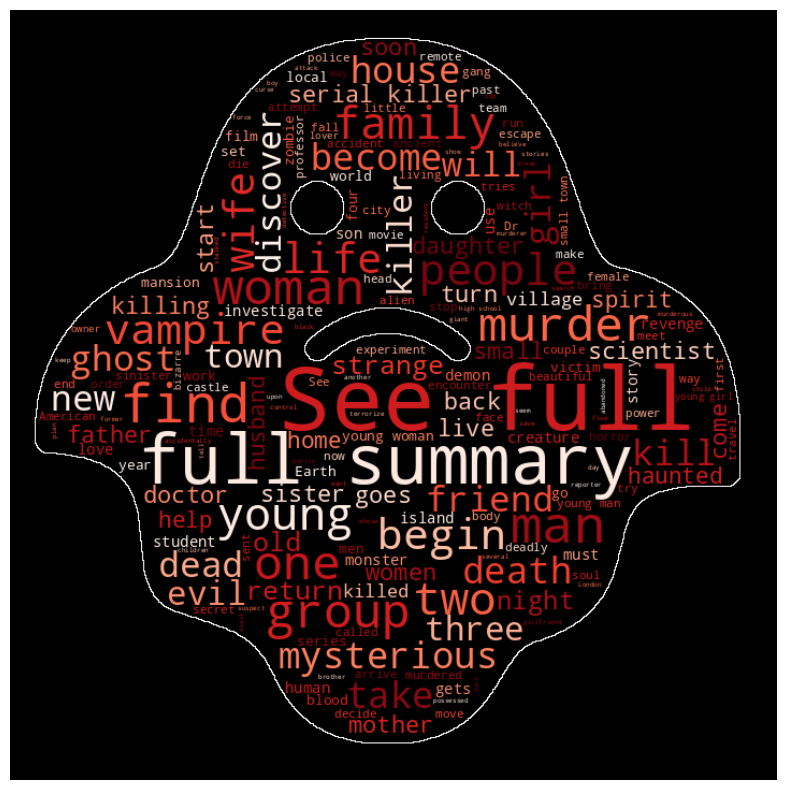

In [22]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud, STOPWORDS


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the image that you want to use as the mask
mask_image = np.array(Image.open(path.join(d, "images/sadghost.png")))

# Create a WordCloud instance with the mask
wordcloud = WordCloud(
    mask=mask_image,
    background_color='black',
    colormap='Reds',
    contour_width=1,        # Adjust the width of the outline
    contour_color='white'   # Set the color of the outline
)

# Generate the word cloud from a text (you can use your description column here)
text = ' '.join(df['description'])
wordcloud.generate(text)

# Display the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

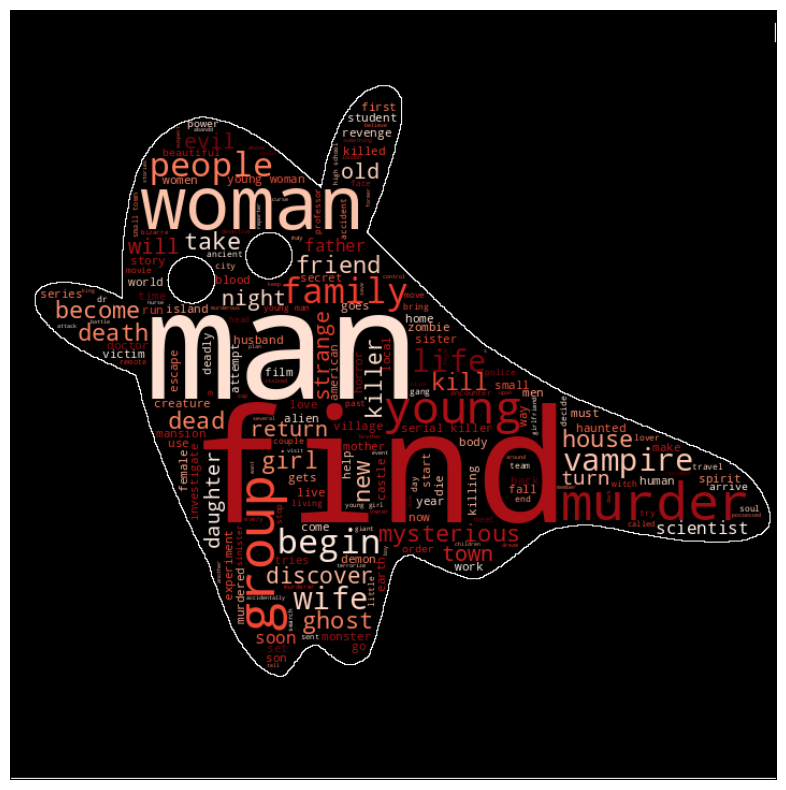

In [23]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud, STOPWORDS


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the image that you want to use as the mask
mask_image = np.array(Image.open(path.join(d, "images/happyghost.png")))

# Create a WordCloud instance with the mask
wordcloud = WordCloud(
    mask=mask_image,
    background_color='black',
    colormap='Reds',
    contour_width=1,        # Adjust the width of the outline
    contour_color='white'   # Set the color of the outline
)

# Generate the word cloud from a text (you can use your description column here)
text = ' '.join(df['cleaned_description'])
wordcloud.generate(text)

# Display the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
import pandas as pd
import plotly.express as px

# Data
data_pool = pd.DataFrame(dict(
    stages=['Original Data (Sourced from IMDB though Kaggle)', 'Films in English', 'Films with Usable Descriptions'],
    counts=[36682, 11017, 7421]))

# Create a horror-themed color palette
horror_colors = ['#800000', '#8B0000', '#A52A2A']

# Create a funnel chart with count labels
fig = px.funnel(data_pool, x='counts', y='stages', title="Horror Film Data Funnel",
                color_discrete_sequence=horror_colors,
                text='stages')

# Customize layout and appearance
fig.update_layout(
    font_family="Arial",
    title_font_family="Arial",
    title_font_color="#FF4500",
    title_font_size=24,
    funnelmode="stack",
    uniformtext_minsize=18,  # Increase the font size for count labels
    uniformtext_mode="show"  # Show text on all bars
)

# Show the chart
fig.show()


In [ ]:
#?wordcloud

# KMeans

In [25]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract the "description" column as the text data for clustering
descriptions = df["cleaned_description"].tolist()

# Convert text data into numerical feature vectors using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(descriptions)

# Perform clustering using K-Means
num_clusters = 9  # Adjust the number of clusters as desired
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels to the DataFrame
df["kmeans_cluster"] = kmeans.labels_

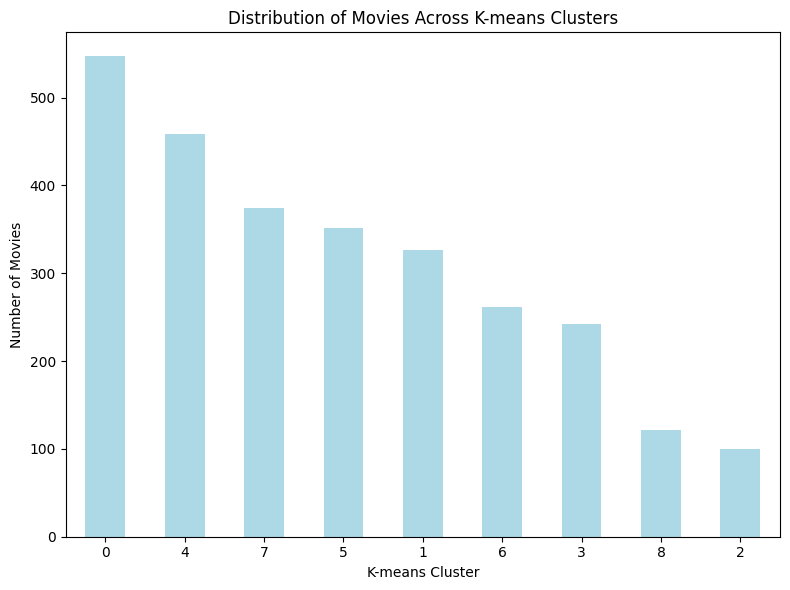

In [26]:
# Calculate value counts of kmeans_cluster
cluster_counts = df.kmeans_cluster.value_counts()

# Plotting
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='lightblue')
plt.xlabel('K-means Cluster')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies Across K-means Clusters')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Elbows

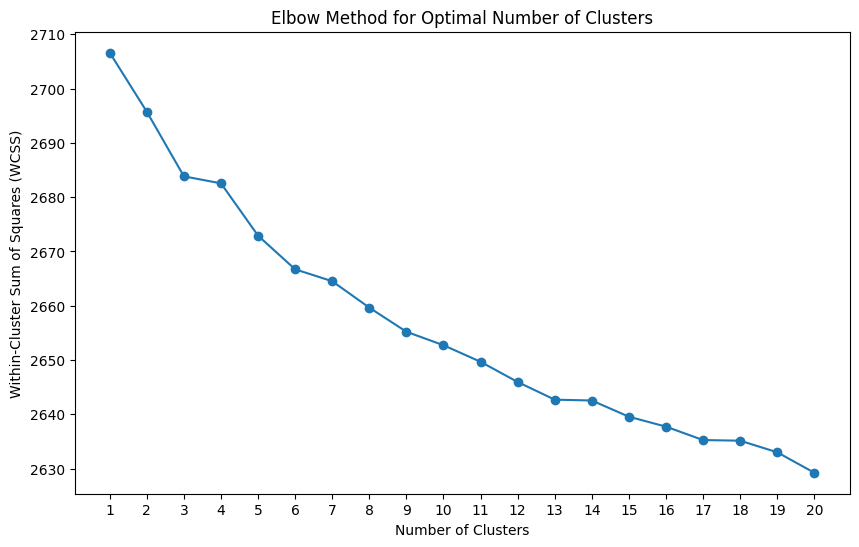

In [27]:
# Define features (X)
X = df['cleaned_description']

# Convert text data into TF-IDF vectors
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
max_clusters = 20  # Set a maximum number of clusters to consider
for num_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_vectorized)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, max_clusters + 1))
plt.show()

## Analysis of the clusters

In [28]:
df.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $),titleId,language,cleaned_description,kmeans_cluster
2,tt0078748,Alien,1979,R,117 min,"Horror, Sci-Fi",8.5,The crew of a commercial spacecraft encounter ...,Ridley Scott,/name/nm0000631/,"Sigourney Weaver, \nTom Skerritt, \nJohn Hurt,...","/name/nm0000244/,/name/nm0000643/,/name/nm0000...",890417.0,78900000.0,tt0078748,en,the crew of a commercial spacecraft encounter ...,0
3,tt0046876,Creature from the Black Lagoon,1954,G,79 min,"Horror, Sci-Fi",6.9,A strange prehistoric beast lurks in the depth...,Jack Arnold,/name/nm0000791/,"Richard Carlson, \nJulie Adams, \nRichard Denn...","/name/nm0137999/,/name/nm0011105/,/name/nm0219...",31716.0,1300000.0,tt0046876,en,a strange prehistoric beast lurks in the depth...,4
5,tt0081505,The Shining,1980,R,146 min,"Drama, Horror",8.4,A family heads to an isolated hotel for the wi...,Stanley Kubrick,/name/nm0000040/,"Jack Nicholson, \nShelley Duvall, \nDanny Lloy...","/name/nm0000197/,/name/nm0001167/,/name/nm0515...",1032203.0,44017374.0,tt0081505,en,a family heads to an isolated hotel for the wi...,4
6,tt0119345,I Know What You Did Last Summer,1997,R,101 min,"Horror, Mystery",5.8,Four young friends bound by a tragic accident ...,Jim Gillespie,/name/nm0318947/,"Jennifer Love Hewitt, \nSarah Michelle Gellar,...","/name/nm0001349/,/name/nm0001264/,/name/nm0000...",149773.0,72586134.0,tt0119345,en,young friends bound by a tragic accident are ...,3
7,tt0289043,28 Days Later,2002,R,113 min,"Drama, Horror, Sci-Fi",7.5,"Four weeks after a mysterious, incurable virus...",Danny Boyle,/name/nm0000965/,"Cillian Murphy, \nNaomie Harris, \nChristopher...","/name/nm0614165/,/name/nm0365140/,/name/nm0001...",420002.0,45064915.0,tt0289043,en,"weeks after a mysterious, incurable virus spr...",4


In [29]:
df[df['director'].str.contains('James Wan', case=False, na=False)]

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $),titleId,language,cleaned_description,kmeans_cluster
26,tt0387564,Saw,2004,R,103 min,"Horror, Mystery, Thriller",7.6,Two strangers awaken in a room with no recolle...,James Wan,/name/nm1490123/,"Cary Elwes, \nLeigh Whannell, \nDanny Glover, ...","/name/nm0000144/,/name/nm1191481/,/name/nm0000...",428399.0,56000369.0,tt0387564,en,strangers awaken in a room with no recollecti...,3
224,tt0455760,Dead Silence,2007,R,89 min,"Horror, Mystery, Thriller",6.1,A young widower returns to his hometown to sea...,James Wan,/name/nm1490123/,"Ryan Kwanten, \nAmber Valletta, \nDonnie Wahlb...","/name/nm0477127/,/name/nm0005520/,/name/nm0005...",96531.0,16809076.0,tt0455760,en,a young widower returns to his hometown to sea...,1


In [30]:
# Save the DataFrame to a CSV file
df.to_csv('manual_analysis.csv', index=False)


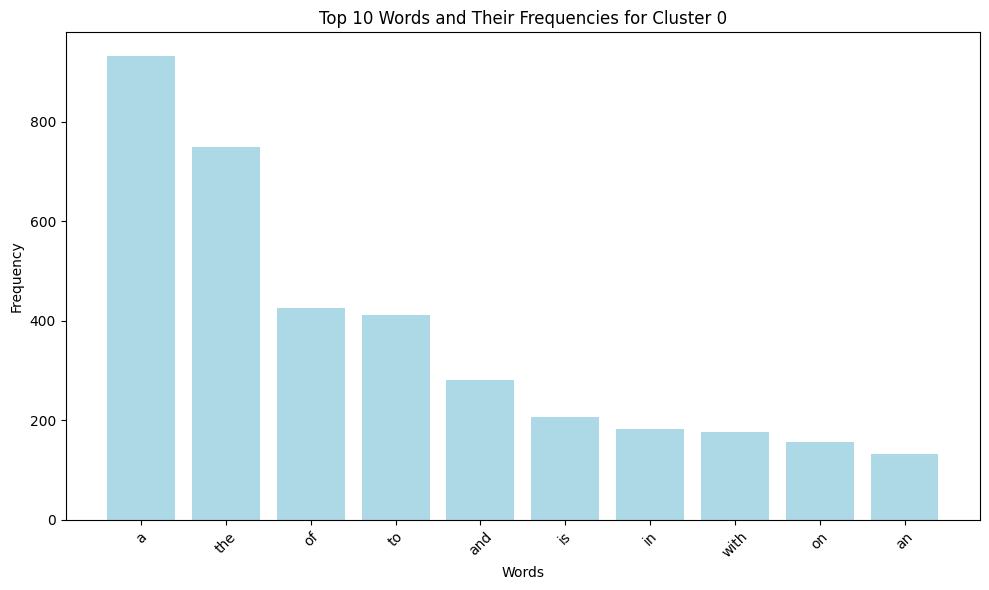

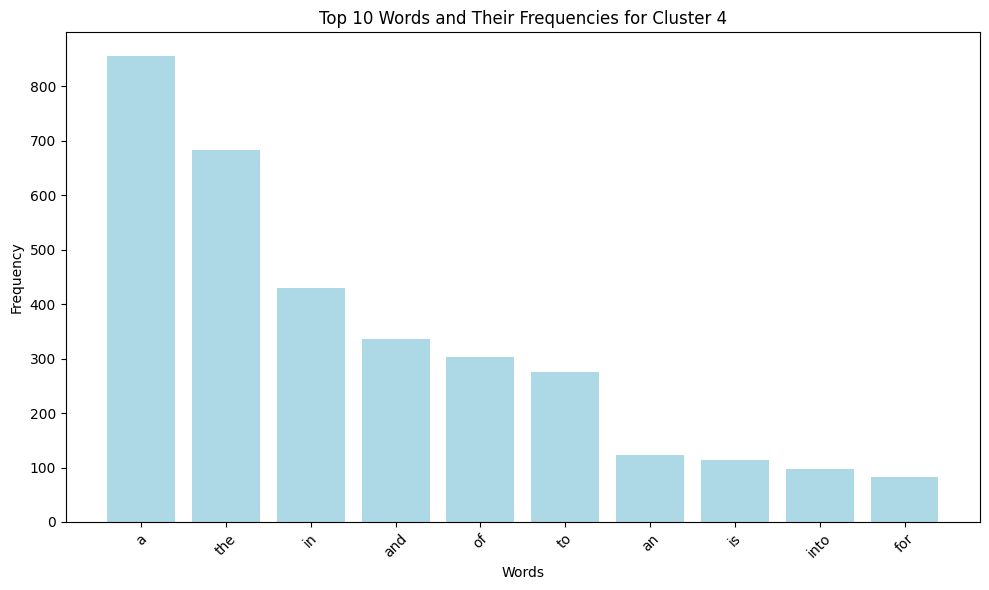

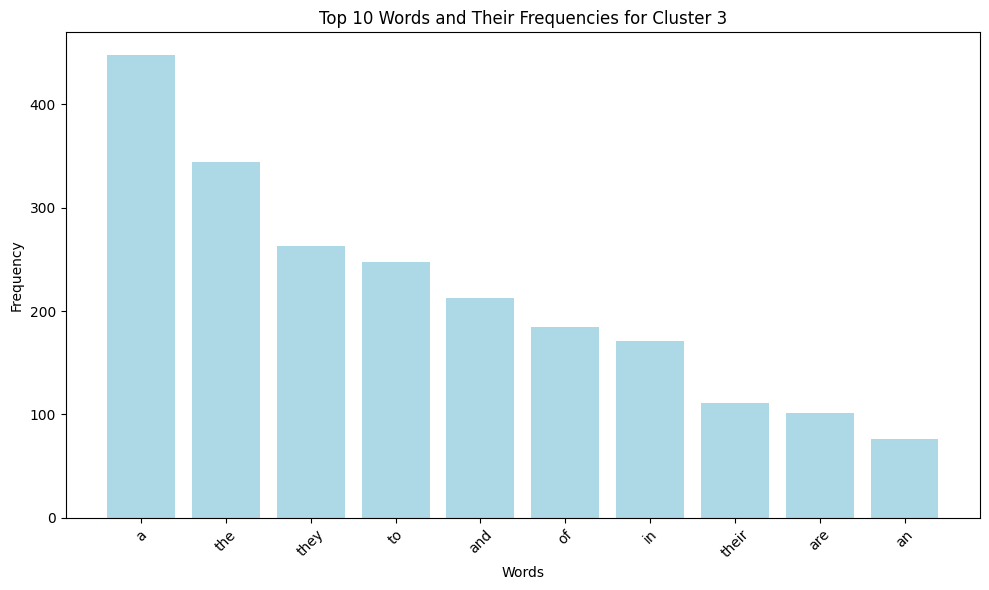

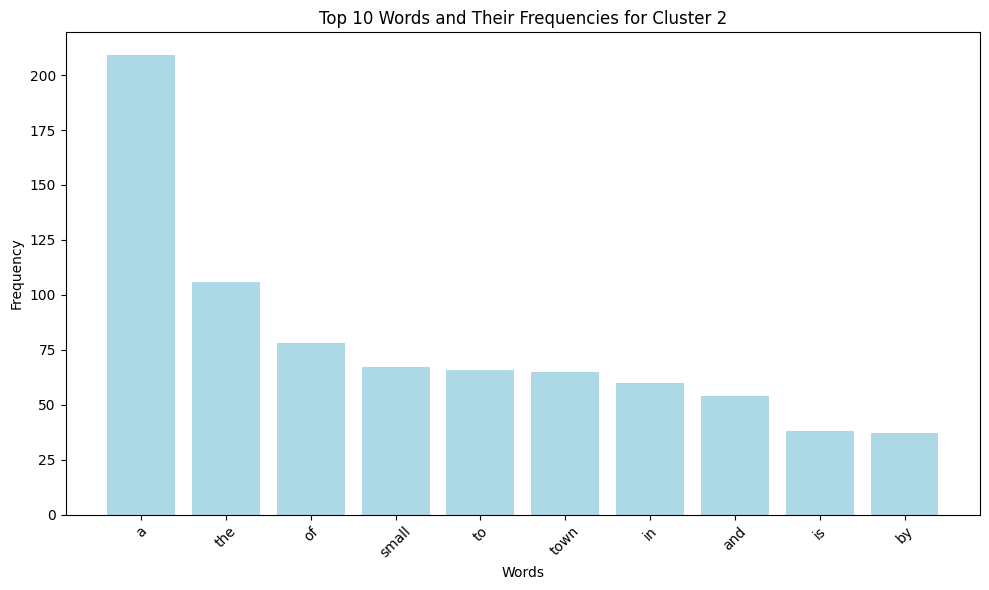

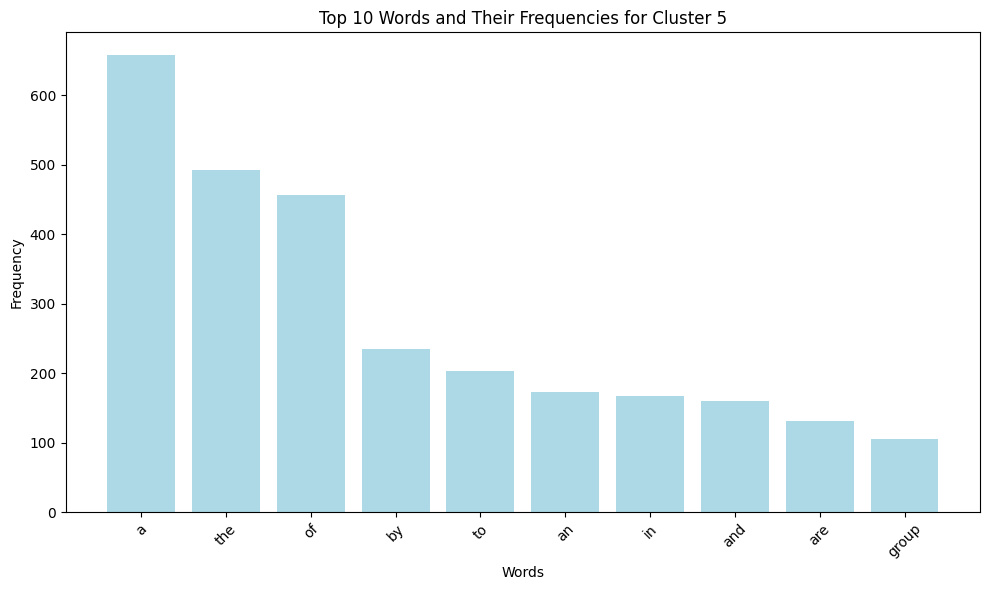

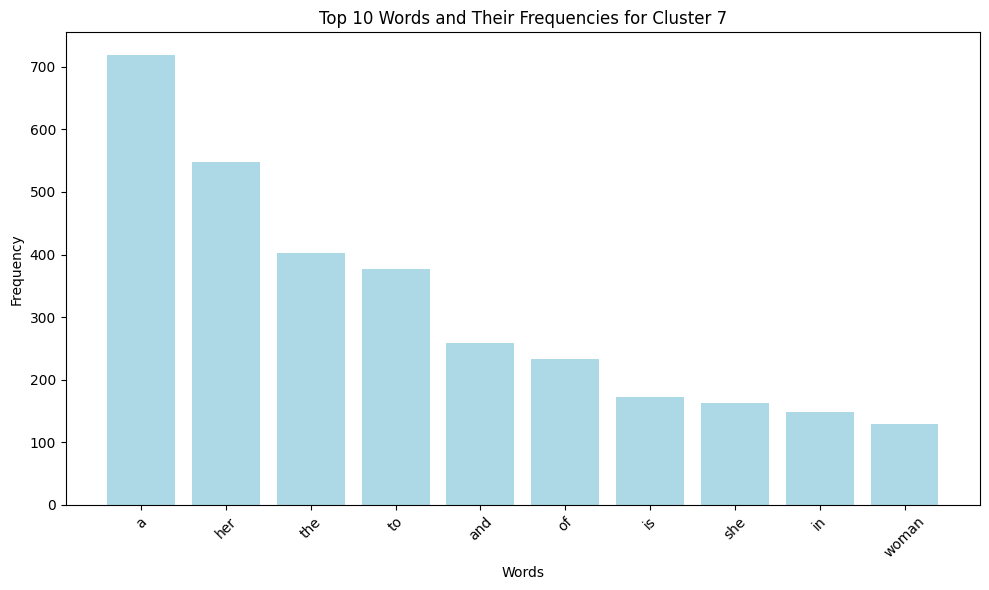

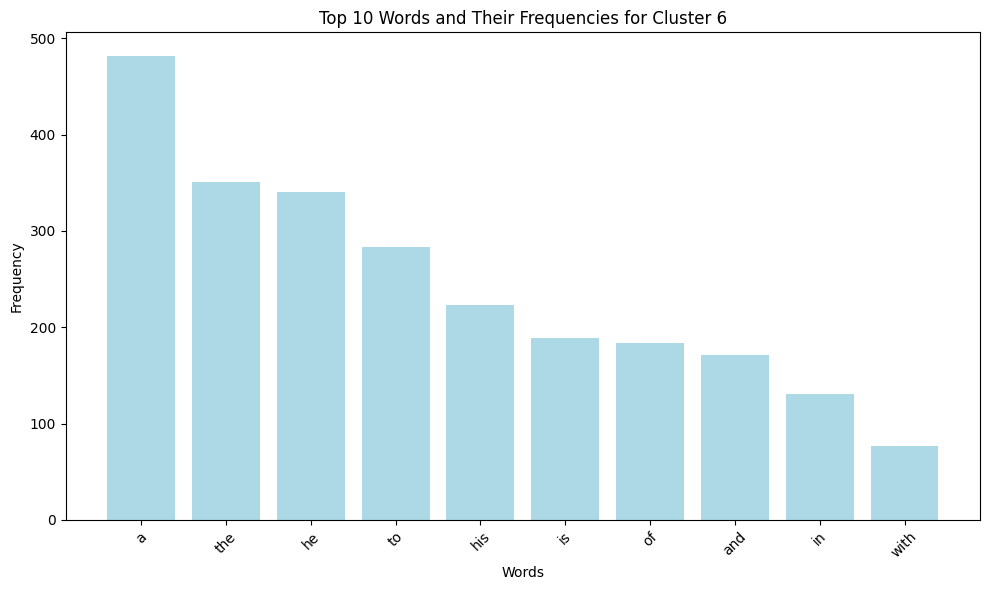

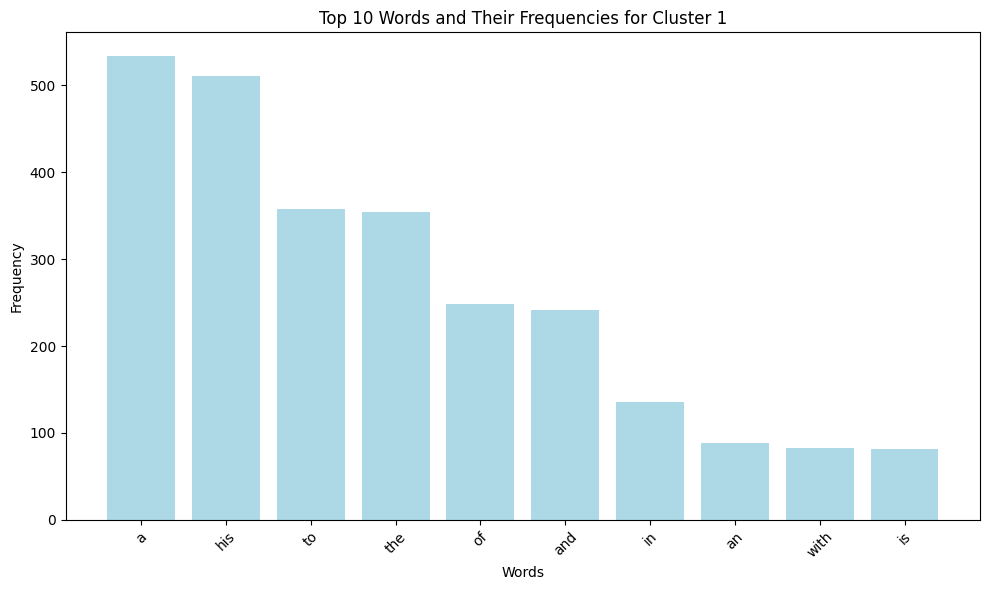

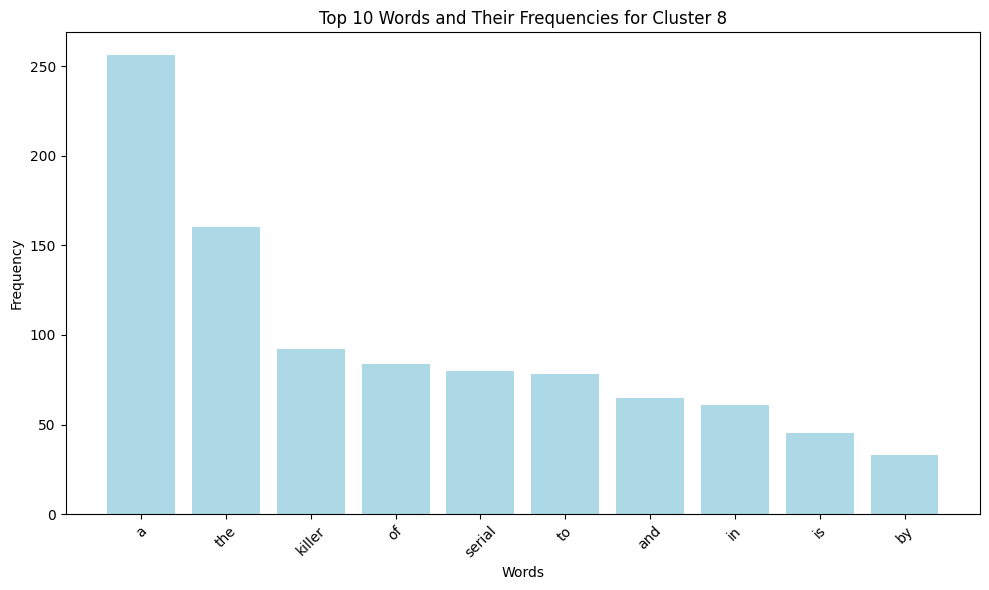

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Define a function to generate bar charts for word frequencies
def generate_bar_chart(df, cluster_column, text_column):
    clusters = df[cluster_column].unique()

    for cluster in clusters:
        cluster_df = df[df[cluster_column] == cluster]
        text = ' '.join(cluster_df[text_column])

        # Calculate word frequencies
        words = text.split()
        word_freq = Counter(words)
        top_words = word_freq.most_common(10)

        # Unzip the top_words list for plotting
        words, freqs = zip(*top_words)

        # Plot bar chart
        plt.figure(figsize=(10, 6))
        plt.bar(words, freqs, color='lightblue')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.title(f'Top 10 Words and Their Frequencies for Cluster {cluster}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Generate bar charts for word frequencies for each cluster
generate_bar_chart(df, 'kmeans_cluster', 'cleaned_description')


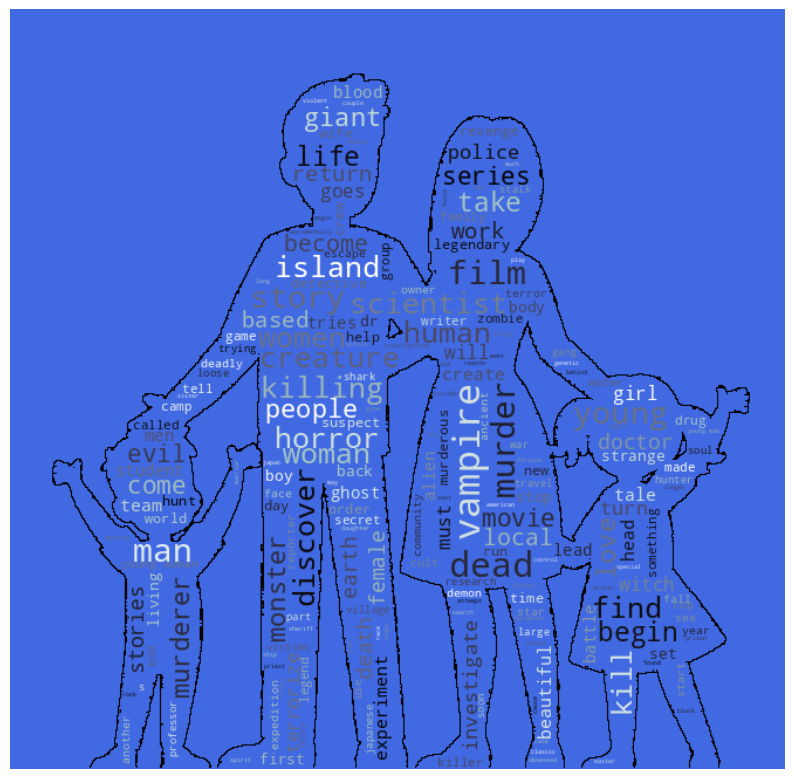

In [33]:
#cluster 0 - possessed kid or haunted family


# Filter descriptions for cluster 0
cluster_0_descriptions = df[df['kmeans_cluster'] == 0]['cleaned_description'].tolist()

# Combine the filtered descriptions into a single text
text = ' '.join(df[df['kmeans_cluster'] == 0]['cleaned_description'].tolist())

# Define the mask image path (replace with your actual image path)
mask_image_path = "images/cluster0.png"

# Read the image that you want to use as the mask
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask_image = np.array(Image.open(path.join(d, mask_image_path)))

# Create a WordCloud instance with the mask and outline parameters
wordcloud = WordCloud(
    mask=mask_image,
    background_color='#4169E1',
    colormap='bone',
    contour_width=1,        # Adjust the width of the outline
    contour_color='black'   # Set the color of the outline
)

# Generate the word cloud from the filtered text
wordcloud.generate(text)

# Display the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

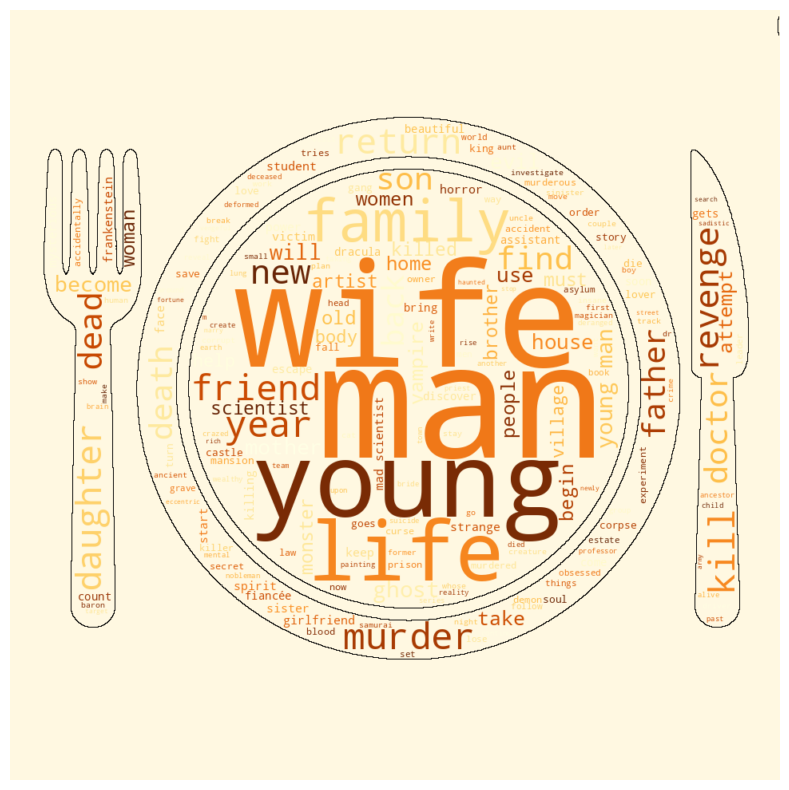

In [34]:
#cluster 1 - evil window silhouette


# Filter descriptions for cluster 1
cluster_1_descriptions = df[df['kmeans_cluster'] == 1]['cleaned_description'].tolist()

# Combine the filtered descriptions into a single text
text = ' '.join(cluster_1_descriptions)

# Define the mask image path (replace with your actual image path)
mask_image_path = "images/cluster1.png"

# Read the image that you want to use as the mask
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask_image = np.array(Image.open(path.join(d, mask_image_path)))

# Create a WordCloud instance with the mask and outline parameters
wordcloud = WordCloud(
    mask=mask_image,
    background_color='#FFF8E1',
    colormap='YlOrBr',
    contour_width=1,        # Adjust the width of the outline
    contour_color='black'   # Set the color of the outline
)

# Generate the word cloud from the filtered text
wordcloud.generate(text)

# Display the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

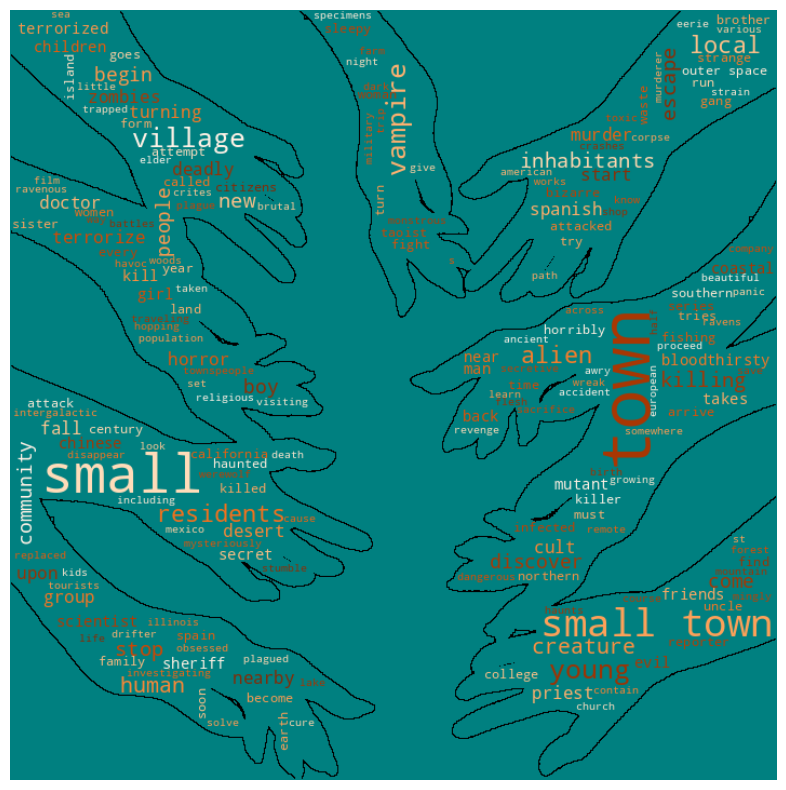

In [35]:
#cluster 2 - young people and their demons


# Filter descriptions for cluster 2
cluster_2_descriptions = df[df['kmeans_cluster'] == 2]['cleaned_description'].tolist()

# Combine the filtered descriptions into a single text
text = ' '.join(cluster_2_descriptions)

# Define the mask image path (replace with your actual image path)
mask_image_path = "images/cluster2.png"

# Read the image that you want to use as the mask
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask_image = np.array(Image.open(path.join(d, mask_image_path)))

# Create a WordCloud instance with the mask and outline parameters
wordcloud = WordCloud(
    mask=mask_image,
    background_color='teal',
    colormap='Oranges',
    contour_width=1,        # Adjust the width of the outline
    contour_color='black'   # Set the color of the outline
)

# Generate the word cloud from the filtered text
wordcloud.generate(text)

# Display the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

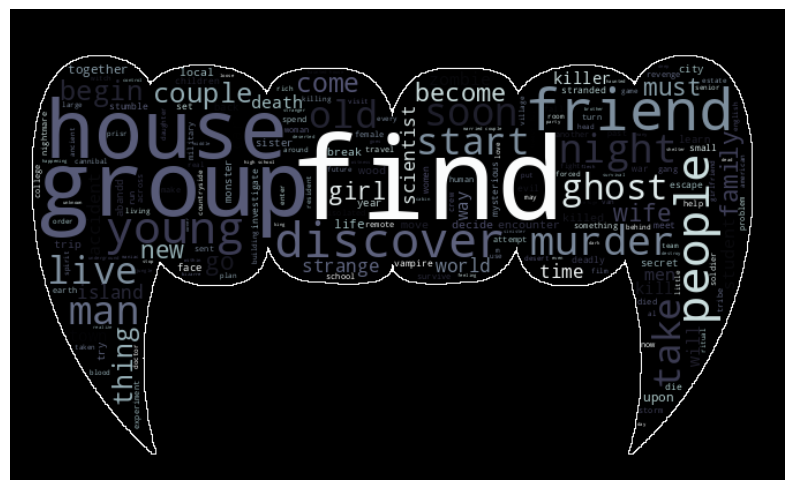

In [36]:
#cluster 3 - vampires and the undead

# Filter descriptions for cluster 3
cluster_3_descriptions = df[df['kmeans_cluster'] == 3]['cleaned_description'].tolist()

# Combine the filtered descriptions into a single text
text = ' '.join(cluster_3_descriptions)

# Define the mask image path (replace with your actual image path)
mask_image_path = "images/cluster3.png"

# Read the image that you want to use as the mask
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask_image = np.array(Image.open(path.join(d, mask_image_path)))

# Create a WordCloud instance with the mask and outline parameters
wordcloud = WordCloud(
    mask=mask_image,
    background_color='Black',
    colormap='bone',
    contour_width=1,        # Adjust the width of the outline
    contour_color='white'   # Set the color of the outline
)

# Generate the word cloud from the filtered text
wordcloud.generate(text)

# Display the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

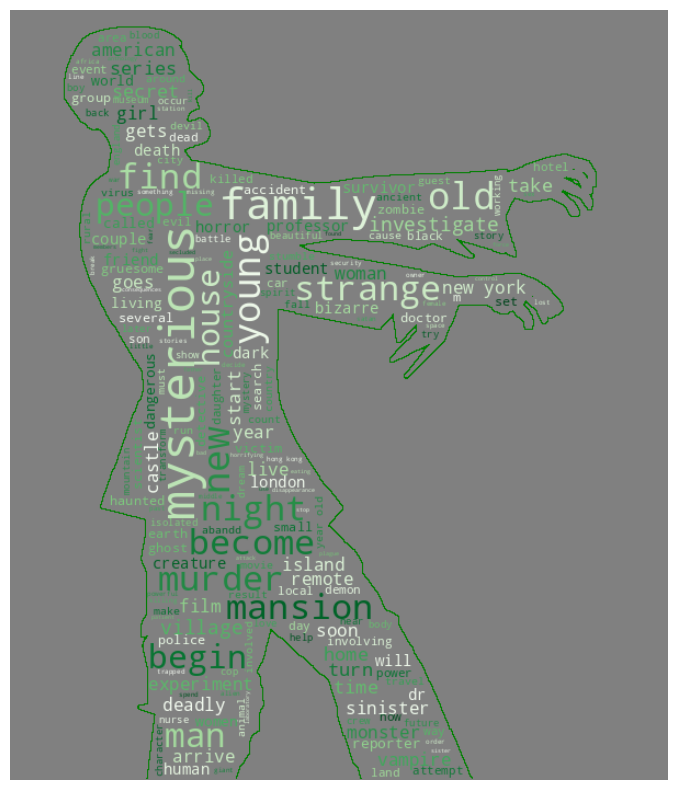

In [37]:
#cluster 4 - zombies and viruses


# Filter descriptions for cluster 4
cluster_4_descriptions = df[df['kmeans_cluster'] == 4]['cleaned_description'].tolist()

# Combine the filtered descriptions into a single text
text = ' '.join(cluster_4_descriptions)

# Define the mask image path (replace with your actual image path)
mask_image_path = "images/cluster4.png"

# Read the image that you want to use as the mask
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask_image = np.array(Image.open(path.join(d, mask_image_path)))

# Create a WordCloud instance with the mask and outline parameters
wordcloud = WordCloud(
    mask=mask_image,
    background_color='#808080',
    colormap='Greens',
    contour_width=1,        # Adjust the width of the outline
    contour_color='green'   # Set the color of the outline
)

# Generate the word cloud from the filtered text
wordcloud.generate(text)

# Display the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

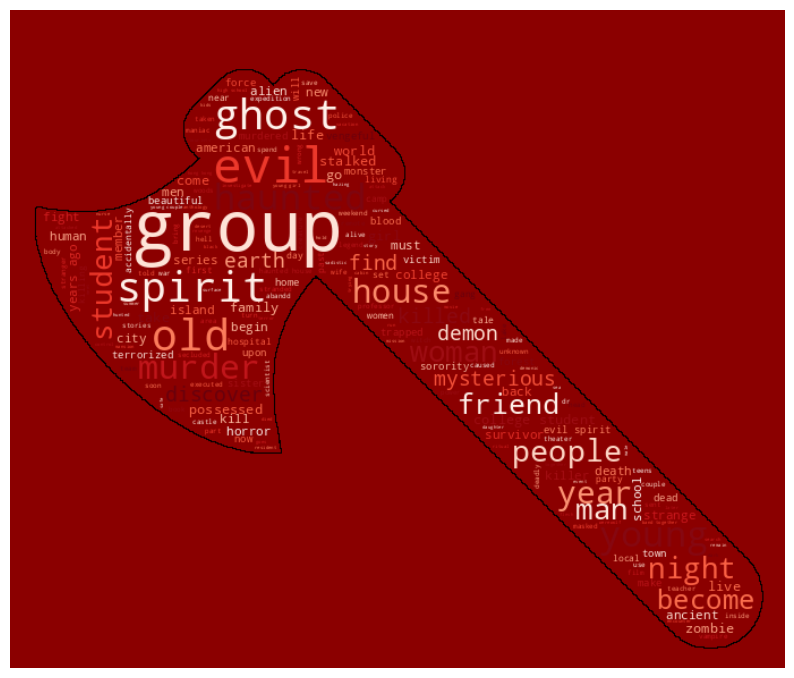

In [38]:
#cluster 5 - anthologies


# Filter descriptions for cluster 3
cluster_5_descriptions = df[df['kmeans_cluster'] == 5]['cleaned_description'].tolist()

# Combine the filtered descriptions into a single text
text = ' '.join(cluster_5_descriptions)

# Define the mask image path (replace with your actual image path)
mask_image_path = "images/cluster5.png"

# Read the image that you want to use as the mask
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask_image = np.array(Image.open(path.join(d, mask_image_path)))

# Create a WordCloud instance with the mask and outline parameters
wordcloud = WordCloud(
    mask=mask_image,
    background_color='darkred',
    colormap='Reds',
    contour_width=1,        # Adjust the width of the outline
    contour_color='black'   # Set the color of the outline
)

# Generate the word cloud from the filtered text
wordcloud.generate(text)

# Display the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

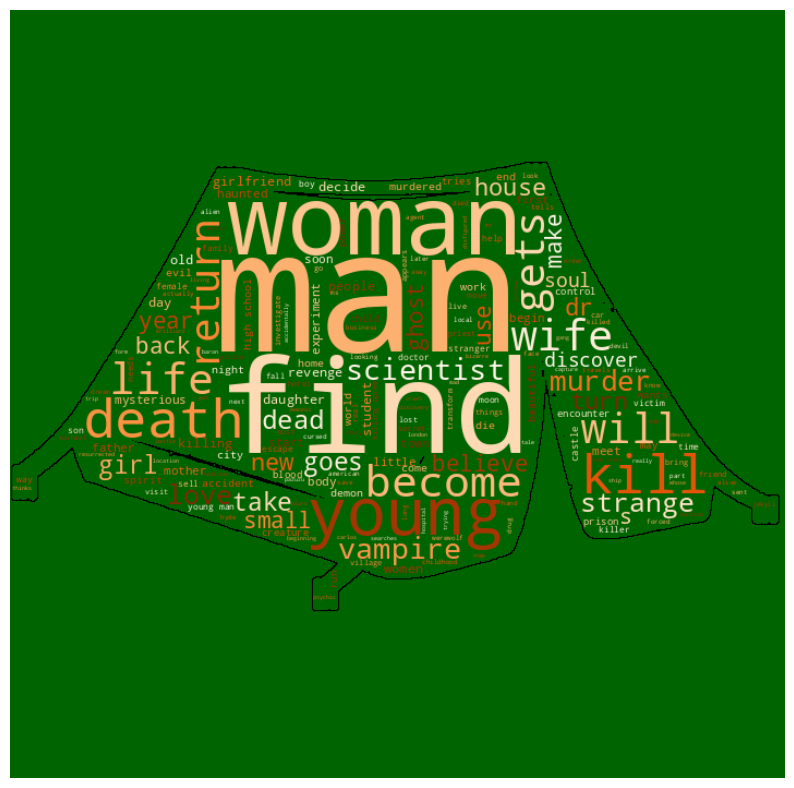

In [39]:
#cluster 6 - school camp


# Filter descriptions for cluster 3
cluster_6_descriptions = df[df['kmeans_cluster'] == 6]['cleaned_description'].tolist()

# Combine the filtered descriptions into a single text
text = ' '.join(cluster_6_descriptions)

# Define the mask image path (replace with your actual image path)
mask_image_path = "images/cluster6.png"

# Read the image that you want to use as the mask
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask_image = np.array(Image.open(path.join(d, mask_image_path)))

# Create a WordCloud instance with the mask and outline parameters
wordcloud = WordCloud(
    mask=mask_image,
    background_color='darkgreen',
    colormap='Oranges',
    contour_width=1,        # Adjust the width of the outline
    contour_color='black'  # Set the color of the outline
)

# Generate the word cloud from the filtered text
wordcloud.generate(text)

# Display the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

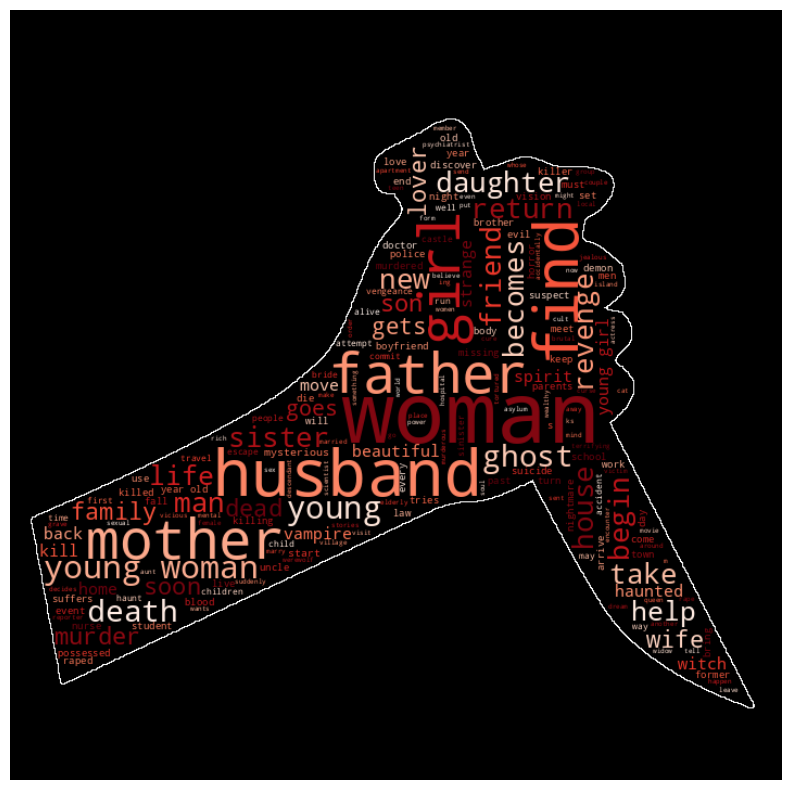

In [40]:
#cluster 7 - serial killer


# Filter descriptions for cluster 3
cluster_7_descriptions = df[df['kmeans_cluster'] == 7]['cleaned_description'].tolist()

# Combine the filtered descriptions into a single text
text = ' '.join(cluster_7_descriptions)

# Define the mask image path (replace with your actual image path)
mask_image_path = "images/cluster7.png"

# Read the image that you want to use as the mask
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask_image = np.array(Image.open(path.join(d, mask_image_path)))

# Create a WordCloud instance with the mask and outline parameters
wordcloud = WordCloud(
    mask=mask_image,
    background_color='black',
    colormap='Reds',
    contour_width=1,        # Adjust the width of the outline
    contour_color='white'   # Set the color of the outline
)

# Generate the word cloud from the filtered text
wordcloud.generate(text)

# Display the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

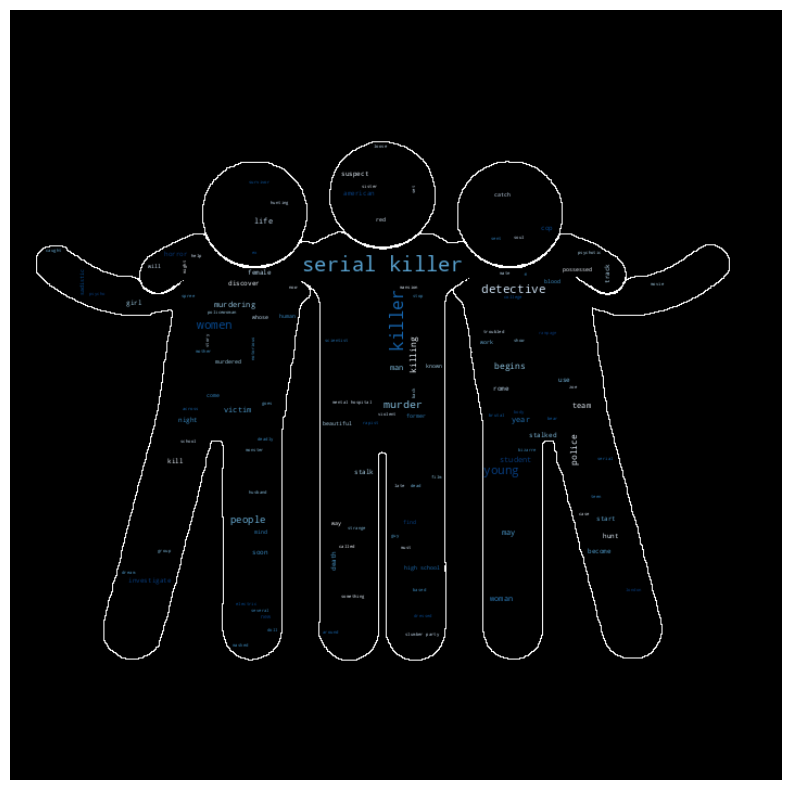

In [41]:
#cluster 8 - group of friends - the last girl


# Filter descriptions for cluster 8
cluster_8_descriptions = df[df['kmeans_cluster'] == 8]['cleaned_description'].tolist()

# Combine the filtered descriptions into a single text
text = ' '.join(cluster_8_descriptions)

# Define the mask image path (replace with your actual image path)
mask_image_path = "images/cluster8.png"

# Read the image that you want to use as the mask
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask_image = np.array(Image.open(path.join(d, mask_image_path)))

# Create a WordCloud instance with the mask and outline parameters
wordcloud = WordCloud(
    mask=mask_image,
    background_color='black',
    colormap='Blues',
    contour_width=1,        # Adjust the width of the outline
    contour_color='white'   # Set the color of the outline
)

# Generate the word cloud from the filtered text
wordcloud.generate(text)

# Display the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# LDA (descoped after a 5th attempt)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Define features (X)
X = df['cleaned_description']

# Convert text data into document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X_matrix = vectorizer.fit_transform(X)

# Perform Latent Dirichlet Allocation (LDA) clustering
num_topics = 5  # You can adjust the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X_matrix)

# Get the topic labels for each document
topic_labels = lda.transform(X_matrix)

# Add the topic labels to the DataFrame
for i in range(num_topics):
    df[f'LDA_topic_{i + 1}'] = topic_labels[:, i]

# Display the modified DataFrame
print(df)

         movie_id                      movie_name  year certificate  runtime  \
0      tt15679400              Knock at the Cabin  2023           R  100 min   
1       tt9764362                        The Menu  2022           R  107 min   
2       tt8760708                           M3GAN  2022       PG-13  102 min   
3      tt13051810                     Viking Wolf  2022       TV-MA   97 min   
5      tt17663992                       Scream VI  2023         NaN  123 min   
...           ...                             ...   ...         ...      ...   
10995   tt0418666                     Eommaui han  1970         NaN      NaN   
11005   tt0286249            Troublesome Night 10  2001         NaN   90 min   
11006   tt6448486                     Death Ouija  2014         NaN   95 min   
11007  tt11341300                          Pikasu  2020         NaN      NaN   
11011  tt26695466  Jekyll a Hyde parodie muzikál!  2022         NaN      NaN   

                           genre  ratin

In [ ]:
df.cluster_label.value_counts()

AttributeError: 'DataFrame' object has no attribute 'cluster_label'

In [ ]:
# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_indices = topic.argsort()[-25:][::-1]
    top_words = [feature_names[i] for i in top_words_indices]
    print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Create a CountVectorizer to convert text into a bag-of-words representation
vectorizer = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_description'])

# Initialize the LDA model with the desired number of clusters (topics)
num_clusters = 15  # Adjust the number of clusters as desired
lda = LatentDirichletAllocation(n_components=num_clusters, random_state=42)

# Fit the LDA model to the data
lda.fit(X)

# Get the document-topic matrix (probability distribution over clusters for each movie)
doc_topic_matrix = lda.transform(X)

# Find the cluster with the highest probability for each movie
df['lda_cluster'] = doc_topic_matrix.argmax(axis=1)

In [ ]:
df.lda_cluster.value_counts()

In [ ]:
df.head()

In [ ]:
# Group by K-Means cluster and LDA topic, and count occurrences
cluster_topic_counts = df.groupby(['kmeans_cluster', 'lda_cluster']).size().reset_index(name='count')

# Pivot the data for plotting
pivot_table = cluster_topic_counts.pivot_table(index='kmeans_cluster', columns='lda_cluster', values='count', fill_value=0)

# Create a bar plot to compare counts
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Comparison of LDA Clusters by K-Means Clusters')
plt.xlabel('LDA Topic')
plt.ylabel('K-Means Cluster')
plt.show()